In [37]:
import json
import pandas as pd
import ast
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
npDf = pd.read_csv('./parksData.csv')
npDf.head()

,Park Code,Park Name,State,Acres,Latitude,Longitude,Description,Activities,Topics,WeatherInfo
0,ACAD,Acadia National Park,ME,47390,44.35,-68.21,Acadia National Park protects the natural beau...,"['Arts and Culture', 'Cultural Demonstrations'...","['Arts', 'Painting', 'Photography', 'Poetry an...","Located on Mount Desert Island in Maine, Acadi..."
1,ARCH,Arches National Park,UT,76519,38.68,-109.57,"Discover a landscape of contrasting colors, la...","['Arts and Culture', 'Astronomy', 'Stargazing'...","['Archeology', 'Farming and Agriculture', 'Ra...","Arches is part of the Colorado Plateau, a ""hig..."
2,BADL,Badlands National Park,SD,242756,43.75,-102.50,The rugged beauty of the Badlands draws visito...,"['Auto and ATV', 'Scenic Driving', 'Astronomy'...","['Archeology', 'Arts', 'Colonization and Settl...",The Badlands weather is variable and unpredict...
3,BIBE,Big Bend National Park,TX,801163,29.25,-103.25,There is a place in Far West Texas where night...,"['Auto and ATV', 'Scenic Driving', 'Astronomy'...","['Archeology', 'Ruins', 'Aviation', 'Farming a...","Big Bend is a desert park, so be prepared for ..."
4,BISC,Biscayne National Park,FL,172924,25.65,-80.08,"Within sight of Miami, yet worlds away, Biscay...","['Boating', 'Motorized Boating', 'Sailing', 'B...","['African American Heritage', 'Arts', 'Maritim...","The park is situated in a subtropical climate,..."


In [56]:
a_df = npDf[['Park Code','Activities']]
a_df['Activities'] = a_df['Activities'].apply(ast.literal_eval)
a_df = a_df.explode('Activities')
a_df.columns = ['Park Code','Activity']
npDf = npDf.merge(a_df,left_on="Park Code",right_on="Park Code",how="inner")
npDf.to_csv('./parksDataNew.csv',index=False)

/var/folders/ts/g1k_lwnx751djnpqtccswrx00000gr/T/ipykernel_90810/3187896072.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_df['Activities'] = a_df['Activities'].apply(ast.literal_eval)


In [22]:
l = npDf.to_dict("records")

ValueError: malformed node or string: 0     ['Arts and Culture', 'Cultural Demonstrations'...
1     ['Arts and Culture', 'Astronomy', 'Stargazing'...
2     ['Auto and ATV', 'Scenic Driving', 'Astronomy'...
3     ['Auto and ATV', 'Scenic Driving', 'Astronomy'...
4     ['Boating', 'Motorized Boating', 'Sailing', 'B...
5     ['Camping', 'Climbing', 'Fishing', 'Hiking', '...
6     ['Astronomy', 'Stargazing', 'Biking', 'Road Bi...
7     ['Astronomy', 'Stargazing', 'Biking', 'Boating...
8     ['Arts and Culture', 'Cultural Demonstrations'...
9     ['Astronomy', 'Stargazing', 'Camping', 'Caving...
10    ['Astronomy', 'Stargazing', 'Boating', 'Motori...
11    ['Camping', 'Backcountry Camping', 'Canoe or K...
12    ['Auto and ATV', 'Scenic Driving', 'Astronomy'...
13    ['Arts and Culture', 'Craft Demonstrations', '...
14    ['Arts and Culture', 'Astronomy', 'Stargazing'...
15    ['Astronomy', 'Stargazing', 'Biking', 'Mountai...
16    ['Astronomy', 'Stargazing', 'Boating', 'Campin...
17    ['Astronomy', 'Stargazing', 'Biking', 'Road Bi...
18    ['Camping', 'Backcountry Camping', 'Canoe or K...
19    ['Arts and Culture', 'Cultural Demonstrations'...
20    ['Arts and Culture', 'Cultural Demonstrations'...
21    ['Auto and ATV', 'Scenic Driving', 'Astronomy'...
22    ['Arts and Culture', 'Cultural Demonstrations'...
23    ['Arts and Culture', 'Craft Demonstrations', '...
24    ['Arts and Culture', 'Live Music', 'Auto and A...
25    ['Arts and Culture', 'Cultural Demonstrations'...
26    ['Auto and ATV', 'Auto Off-Roading', 'Camping'...
27    ['Camping', 'Backcountry Camping', 'Guided Tou...
28    ['Arts and Culture', 'Biking', 'Camping', 'Bac...
29    ['Auto and ATV', 'Scenic Driving', 'Biking', '...
30    ['Arts and Culture', 'Astronomy', 'Stargazing'...
31    ['Auto and ATV', 'Scenic Driving', 'Astronomy'...
32    ['Boating', 'Camping', 'Backcountry Camping', ...
33    ['Astronomy', 'Stargazing', 'Boating', 'Boat T...
34    ['Boating', 'Camping', 'Backcountry Camping', ...
35    ['Astronomy', 'Stargazing', 'Biking', 'Boating...
36    ['Auto and ATV', 'Scenic Driving', 'Astronomy'...
37    ['Astronomy', 'Stargazing', 'Biking', 'Boating...
38    ['Auto and ATV', 'Scenic Driving', 'Astronomy'...
39    ['Auto and ATV', 'Scenic Driving', 'Astronomy'...
40    ['Auto and ATV', 'Scenic Driving', 'Biking', '...
41    ['Astronomy', 'Stargazing', 'Biking', 'Road Bi...
42    ['Arts and Culture', 'Cultural Demonstrations'...
43    ['Astronomy', 'Stargazing', 'Biking', 'Road Bi...
44    ['Arts and Culture', 'Cultural Demonstrations'...
45    ['Auto and ATV', 'Scenic Driving', 'Biking', '...
46    ['Arts and Culture', 'Auto and ATV', 'Scenic D...
47    ['Auto and ATV', 'Scenic Driving', 'Astronomy'...
48    ['Astronomy', 'Stargazing', 'Biking', 'Road Bi...
49    ['Auto and ATV', 'Scenic Driving', 'Astronomy'...
50    ['Arts and Culture', 'Cultural Demonstrations'...
51    ['Auto and ATV', 'Scenic Driving', 'Biking', '...
52    ['Arts and Culture', 'Auto and ATV', 'ATV Off-...
53    ['Arts and Culture', 'Auto and ATV', 'Scenic D...
54    ['Arts and Culture', 'Auto and ATV', 'Scenic D...
55    ['Arts and Culture', 'Astronomy', 'Stargazing'...
Name: Activities, dtype: object

In [23]:
li = [ast.literal_eval(i['Activities']) for i in l]

In [25]:
flat_list = [item for sublist in li for item in sublist]

In [49]:
rainierMask = np.array(Image.open("./moose.png"))
stopwords = set(STOPWORDS)
wc = WordCloud(background_color="black", max_words=2000, mask=rainierMask,
               stopwords=stopwords, contour_width=3, contour_color='steelblue')
wc.generate(', '.join(flat_list))

<Figure size 640x480 with 0 Axes>

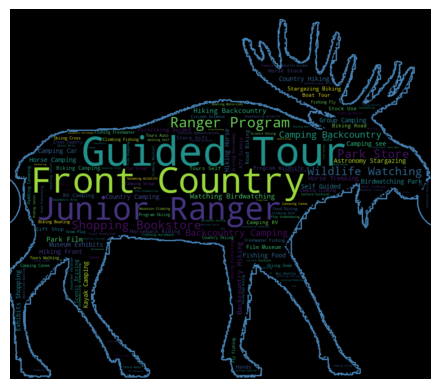

<Figure size 640x480 with 0 Axes>

In [51]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()